In [18]:
from dolfin import *
mesh = UnitSquareMesh(32, 32)
element = FiniteElement("Lagrange", triangle, 1)
V = FunctionSpace(mesh, element)
u = Function(V)
v = TestFunction(V)
f = Constant(-6.0)
g = Expression("1 + x[0]*x[0] + 2*x[1]*x[1]", degree=2)
bc = DirichletBC(V, g, DomainBoundary())
F = inner(grad(u), grad(v))*dx - f*v*dx
solve(F == 0, u, bc)
File("dolfin_poisson.pvd") << u

In [19]:
error_L2 = errornorm(g, u, 'L2')
error_H1 = errornorm(g, u, 'H1')

In [20]:
# Print errors
print('error_L2 =', error_L2)
print('error_H1 =', error_H1)

error_L2 = 0.000514693629575706
error_H1 = 0.04034685955808227


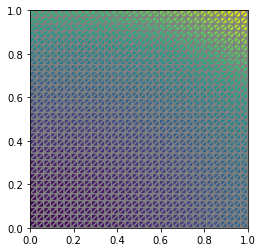

In [17]:
# Plot solution
u.rename('u', 'solution')
plot(u)
plot(mesh)